1. Simple Linear Regression
----
First, import the libraries and fix the dataset.

In [5]:
# Importing the libraries
library(MASS)
library(ISLR)

# Fixing the dataset
fix(Boston)
print("Names of data in Boston dataset:")
names(Boston)
attach(Boston)

[1] "Names of data in Boston dataset:"


[1] "crim"    "zn"      "indus"   "chas"    "nox"     "rm"      "age"    
 [8] "dis"     "rad"     "tax"     "ptratio" "black"   "lstat"   "medv"

The following objects are masked from Boston (pos = 3):

    age, black, chas, crim, dis, indus, lstat, medv, nox, ptratio, rad,
    rm, tax, zn

The following objects are masked from Boston (pos = 4):

    age, black, chas, crim, dis, indus, lstat, medv, nox, ptratio, rad,
    rm, tax, zn



Signify the appropriate data using Attach()
---

In [6]:
lm.fit=lm(medv~lstat, data=Boston)            # Fit the model
lm.fit                                        # Output Coefficients and lstat
summary(lm.fit)                               # Output a summary of the fit
names(lm.fit)                                 # Output the pieces of information stored in lm.fit
coef(lm.fit)                                  # Essentially the same as lm.fit in output


Call:
lm(formula = medv ~ lstat, data = Boston)

Coefficients:
(Intercept)        lstat  
      34.55        -0.95  



Call:
lm(formula = medv ~ lstat, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.168  -3.990  -1.318   2.034  24.500 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 34.55384    0.56263   61.41   <2e-16 ***
lstat       -0.95005    0.03873  -24.53   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.216 on 504 degrees of freedom
Multiple R-squared:  0.5441,	Adjusted R-squared:  0.5432 
F-statistic: 601.6 on 1 and 504 DF,  p-value: < 2.2e-16


[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"

(Intercept)       lstat 
 34.5538409  -0.9500494

Next, we can perform a confidence interval on the fit.
---

In [7]:
confint(lm.fit)                               # Outputs a 95% two-sided P-test with Mu and lstat

,2.5 %,97.5 %
(Intercept),33.448457,35.6592247
lstat,-1.026148,-0.8739505


Using predict(), we can predict confidence intervals for a given sequence.
---

In [8]:
predict(lm.fit, data.frame(lstat=(c(5, 10, 15))), interval="confidence")
predict(lm.fit, data.frame(lstat=(c(5, 10, 15))), interval="prediction")

,fit,lwr,upr
1,29.80359,29.00741,30.59978
2,25.05335,24.47413,25.63256
3,20.30310,19.73159,20.87461


,fit,lwr,upr
1,29.80359,17.565675,42.04151
2,25.05335,12.827626,37.27907
3,20.30310,8.077742,32.52846


Now that we've got the fit, we can begin plotting.
---

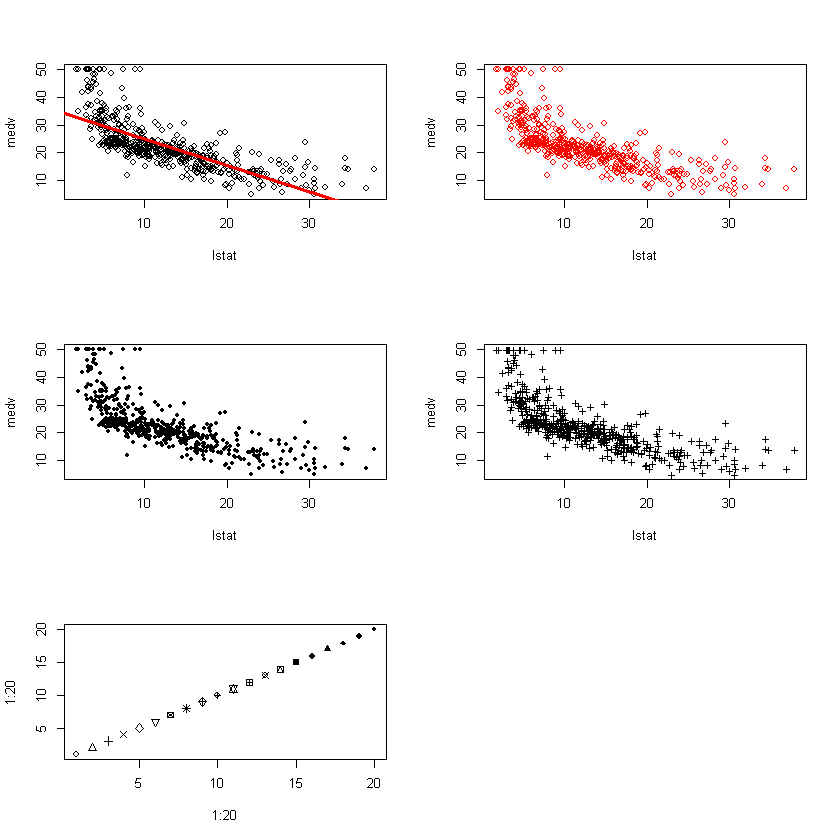

In [27]:
par(mfrow=c(3,2))                             # Create a 3x2 panel for plotting
plot(lstat, medv)                             # Plots the initial variables against eachother
abline(lm.fit)                                # Plots the A-B line produced by the linear fit
abline(lm.fit, lwd=3)                         # Increases the line width to 3 of the abline
abline(lm.fit, lwd=3, col="red")              # Changes the abline's color to red
plot(lstat, medv, col="red")                  # Plots lstat x medv in red
plot(lstat, medv, pch=20)                     # Plots lstat x medv with clean dots
plot(lstat, medv, pch="+")                    # Plots lstat x medv in addition operators
plot(1:20, 1:20, pch=1:20)                    # Just a nice little graphical plot of all options
                                              # of possible characters to plot with.

In order to view multiple plots, we'll split the viewing space into four panes.
----

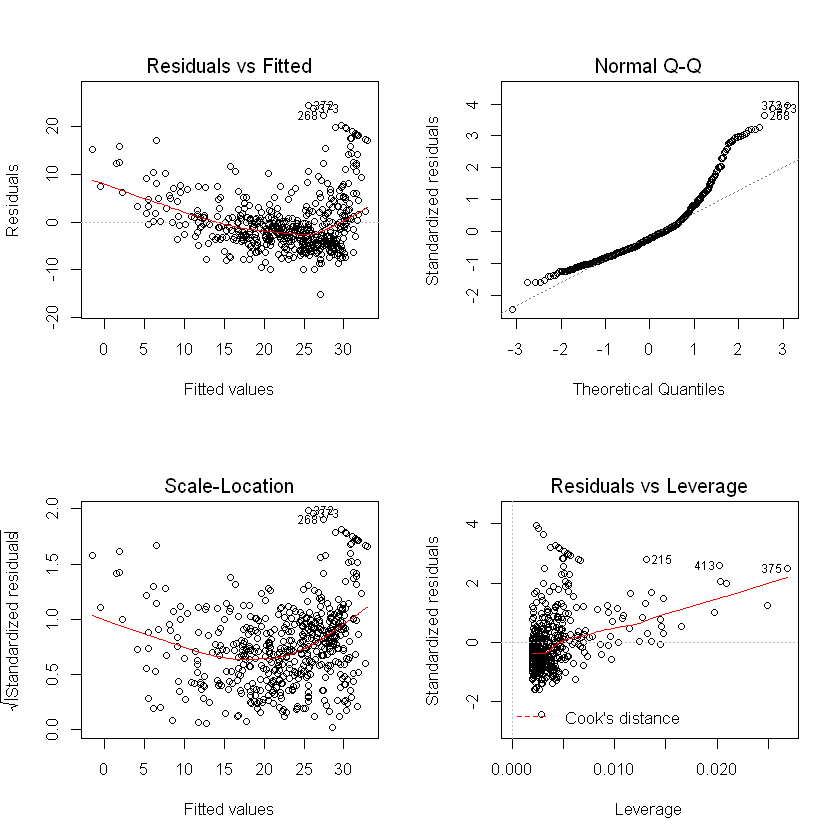

In [10]:
par(mfrow=c(2,2))                             # Creates four spaces for plotting
plot(lm.fit)                                  # Plots the first four variables of lm.fit

Alternatively, you can compute and plot the residuals manually.
----

375 
375

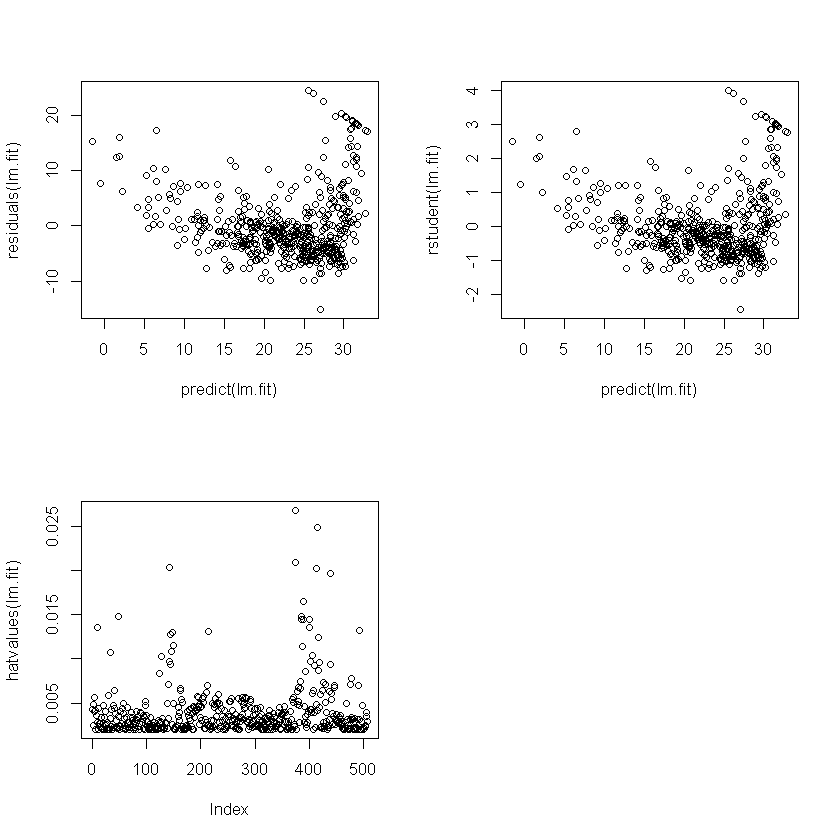

In [25]:
par(mfrow=c(2,2))                             # Create a 2x2 panel for plotting
plot(predict(lm.fit), residuals(lm.fit))      # Plots residuals against the predicted values
plot(predict(lm.fit), rstudent(lm.fit))       # Plots rstudent against the predicted values
plot(hatvalues(lm.fit))                       # Computes and plots leverage statistics
which.max(hatvalues(lm.fit))                  # Gives the maximum prediction of the fit model

2. Multiple Linear Regression  
----
In R, the fit function for a linear model is in the format of lm(y~x1+x2+x3), essentially, your output and predictor variables.

In [12]:
lm.fit=lm(medv~lstat+age, data=Boston)        # Plot the multiple regression with lstat + age = medv
summary(lm.fit)                               # Output the linear fit summary


Call:
lm(formula = medv ~ lstat + age, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.981  -3.978  -1.283   1.968  23.158 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 33.22276    0.73085  45.458  < 2e-16 ***
lstat       -1.03207    0.04819 -21.416  < 2e-16 ***
age          0.03454    0.01223   2.826  0.00491 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.173 on 503 degrees of freedom
Multiple R-squared:  0.5513,	Adjusted R-squared:  0.5495 
F-statistic:   309 on 2 and 503 DF,  p-value: < 2.2e-16


If instead, you'd like to plot all variables as predictors for a singular variable...:
---

In [13]:
lm.fit=lm(medv~., data=Boston)                # Fits all variables as predictors to medv
summary(lm.fit)                               # Outputs the summary of the linear model


Call:
lm(formula = medv ~ ., data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.595  -2.730  -0.518   1.777  26.199 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.646e+01  5.103e+00   7.144 3.28e-12 ***
crim        -1.080e-01  3.286e-02  -3.287 0.001087 ** 
zn           4.642e-02  1.373e-02   3.382 0.000778 ***
indus        2.056e-02  6.150e-02   0.334 0.738288    
chas         2.687e+00  8.616e-01   3.118 0.001925 ** 
nox         -1.777e+01  3.820e+00  -4.651 4.25e-06 ***
rm           3.810e+00  4.179e-01   9.116  < 2e-16 ***
age          6.922e-04  1.321e-02   0.052 0.958229    
dis         -1.476e+00  1.995e-01  -7.398 6.01e-13 ***
rad          3.060e-01  6.635e-02   4.613 5.07e-06 ***
tax         -1.233e-02  3.760e-03  -3.280 0.001112 ** 
ptratio     -9.527e-01  1.308e-01  -7.283 1.31e-12 ***
black        9.312e-03  2.686e-03   3.467 0.000573 ***
lstat       -5.248e-01  5.072e-02 -10.347  < 2e-16 ***
---
Signif. codes:  0

Sometimes, we'd like to check out the Variance Inflation Factor, or essentially measure how the variance changes as the predictor variable(s), $x_i$, increases.
---
In order to do this, we need to first install the "car" package to use the function vif()

In [16]:
install.packages("car", repos='http://cran.us.r-project.org')
library(car)

# Calculate the Variance Inflation Factor of the linear model
vif(lm.fit)                                   # Calculate the variance inflation factor of the dataset
lm.fit1=lm(medv~.-age, data=Boston)           # Fits all variables as predictors to medv, except age.
summary(lm.fit1)

also installing the dependencies 'lattice', 'minqa', 'nloptr', 'Rcpp', 'RcppEigen', 'nlme', 'Matrix', 'lme4', 'SparseM', 'MatrixModels', 'mgcv', 'nnet', 'pbkrtest', 'quantreg'



package 'lattice' successfully unpacked and MD5 sums checked
package 'minqa' successfully unpacked and MD5 sums checked
package 'nloptr' successfully unpacked and MD5 sums checked
package 'Rcpp' successfully unpacked and MD5 sums checked
package 'RcppEigen' successfully unpacked and MD5 sums checked
package 'nlme' successfully unpacked and MD5 sums checked
package 'Matrix' successfully unpacked and MD5 sums checked
package 'lme4' successfully unpacked and MD5 sums checked
package 'SparseM' successfully unpacked and MD5 sums checked
package 'MatrixModels' successfully unpacked and MD5 sums checked
package 'mgcv' successfully unpacked and MD5 sums checked
package 'nnet' successfully unpacked and MD5 sums checked
package 'pbkrtest' successfully unpacked and MD5 sums checked
package 'quantreg' successfully unpacked and MD5 sums checked
package 'car' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Jeff\AppData\Local\Temp\RtmpspFeLb\downloaded_pack

Warning message:
"package 'car' was built under R version 3.4.3"

crim       zn    indus     chas      nox       rm      age      dis 
1.792192 2.298758 3.991596 1.073995 4.393720 1.933744 3.100826 3.955945 
     rad      tax  ptratio    black    lstat 
7.484496 9.008554 1.799084 1.348521 2.941491


Call:
lm(formula = medv ~ . - age, data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.6054  -2.7313  -0.5188   1.7601  26.2243 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  36.436927   5.080119   7.172 2.72e-12 ***
crim         -0.108006   0.032832  -3.290 0.001075 ** 
zn            0.046334   0.013613   3.404 0.000719 ***
indus         0.020562   0.061433   0.335 0.737989    
chas          2.689026   0.859598   3.128 0.001863 ** 
nox         -17.713540   3.679308  -4.814 1.97e-06 ***
rm            3.814394   0.408480   9.338  < 2e-16 ***
dis          -1.478612   0.190611  -7.757 5.03e-14 ***
rad           0.305786   0.066089   4.627 4.75e-06 ***
tax          -0.012329   0.003755  -3.283 0.001099 ** 
ptratio      -0.952211   0.130294  -7.308 1.10e-12 ***
black         0.009321   0.002678   3.481 0.000544 ***
lstat        -0.523852   0.047625 -10.999  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1

Alternatively, to update a model and remove a variable, you can do:
---

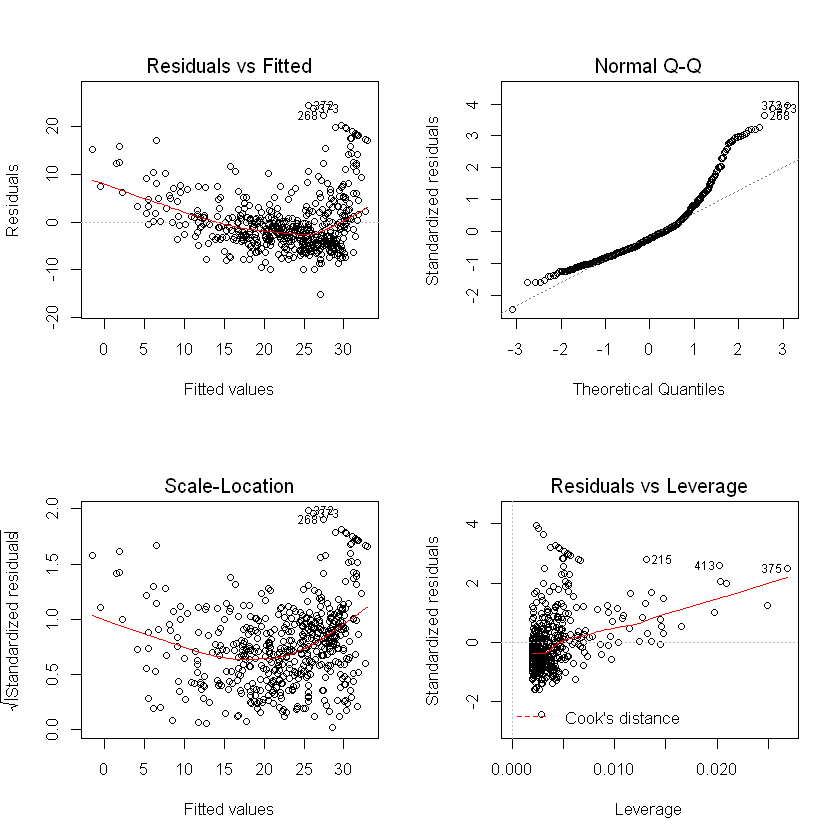

In [24]:
lm.fit1=update(lm.fit, ~.-age)
par(mfrow=c(2,2))                             # Create a 2x2 panel for plotting
plot(lm.fit1)

3. Interaction Terms  
---
To denote interaction terms between two variables, utilize variable_one\*variable_two

In [19]:
summary(lm(medv~lstat*age, data=Boston))      # Includes the interaction terms between lstat and age


Call:
lm(formula = medv ~ lstat * age, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.806  -4.045  -1.333   2.085  27.552 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 36.0885359  1.4698355  24.553  < 2e-16 ***
lstat       -1.3921168  0.1674555  -8.313 8.78e-16 ***
age         -0.0007209  0.0198792  -0.036   0.9711    
lstat:age    0.0041560  0.0018518   2.244   0.0252 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.149 on 502 degrees of freedom
Multiple R-squared:  0.5557,	Adjusted R-squared:  0.5531 
F-statistic: 209.3 on 3 and 502 DF,  p-value: < 2.2e-16


4. Non-Linear Transformations of Predictors 
----
Instead of fitting to the linear fit of a variable, you can fit to the squared value of the variable to attempt to see if it is a closer fit, i.e., that the relationship between the predictor and the outcome variable is non-linear.

In [20]:
lm.fit2=lm(medv~lstat+I(lstat^2))             # Make a linear model w/ lstat and lstat^2 as predictors
summary(lm.fit2)                              # Output a summary


Call:
lm(formula = medv ~ lstat + I(lstat^2))

Residuals:
     Min       1Q   Median       3Q      Max 
-15.2834  -3.8313  -0.5295   2.3095  25.4148 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 42.862007   0.872084   49.15   <2e-16 ***
lstat       -2.332821   0.123803  -18.84   <2e-16 ***
I(lstat^2)   0.043547   0.003745   11.63   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.524 on 503 degrees of freedom
Multiple R-squared:  0.6407,	Adjusted R-squared:  0.6393 
F-statistic: 448.5 on 2 and 503 DF,  p-value: < 2.2e-16


Note, the near-zero p-value of lstat^2 (.003) suggests it leads to an improved model
----
In order to quantify its superiority over lstat, we can use anova()

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
504,19472.38,NA,NA,NA,NA
503,15347.24,1,4125.138,135.1998,7.630116e-28


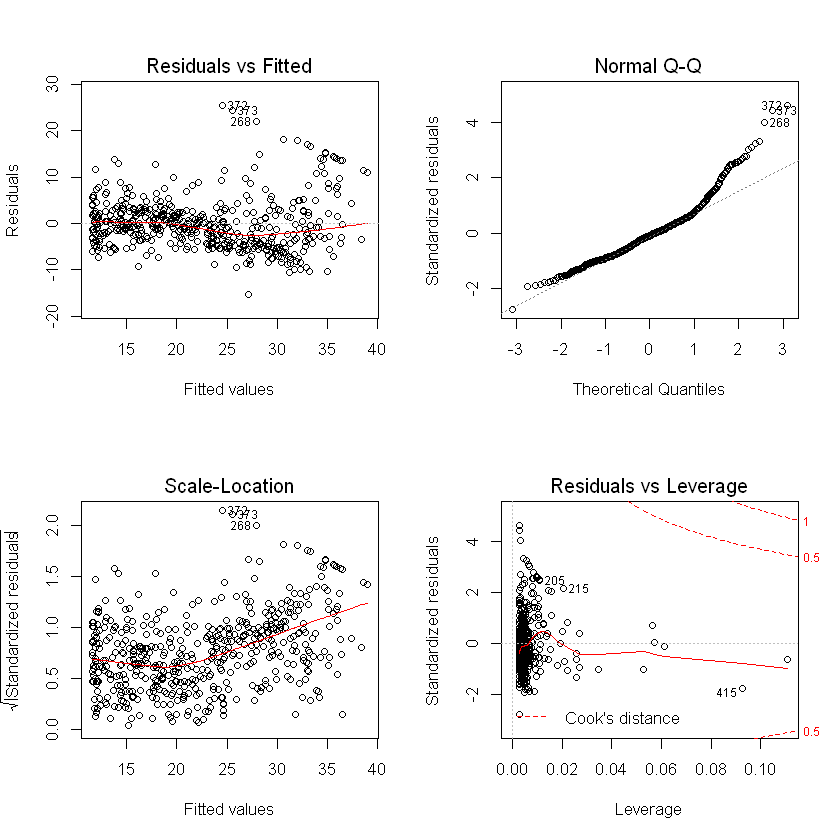

In [21]:
lm.fit=lm(medv~lstat)                         # Fits lstat as a predictor to medv
anova(lm.fit, lm.fit2)                        # Compare the performance of the two linear models

par(mfrow=c(2,2))                             # Create a 2x2 panel for plotting
plot(lm.fit2)                                 # Plot the lstat^2 model

Sometimes, we may want an even higher polynomial fit
---


Call:
lm(formula = medv ~ poly(lstat, 5))

Residuals:
     Min       1Q   Median       3Q      Max 
-13.5433  -3.1039  -0.7052   2.0844  27.1153 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       22.5328     0.2318  97.197  < 2e-16 ***
poly(lstat, 5)1 -152.4595     5.2148 -29.236  < 2e-16 ***
poly(lstat, 5)2   64.2272     5.2148  12.316  < 2e-16 ***
poly(lstat, 5)3  -27.0511     5.2148  -5.187 3.10e-07 ***
poly(lstat, 5)4   25.4517     5.2148   4.881 1.42e-06 ***
poly(lstat, 5)5  -19.2524     5.2148  -3.692 0.000247 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.215 on 500 degrees of freedom
Multiple R-squared:  0.6817,	Adjusted R-squared:  0.6785 
F-statistic: 214.2 on 5 and 500 DF,  p-value: < 2.2e-16


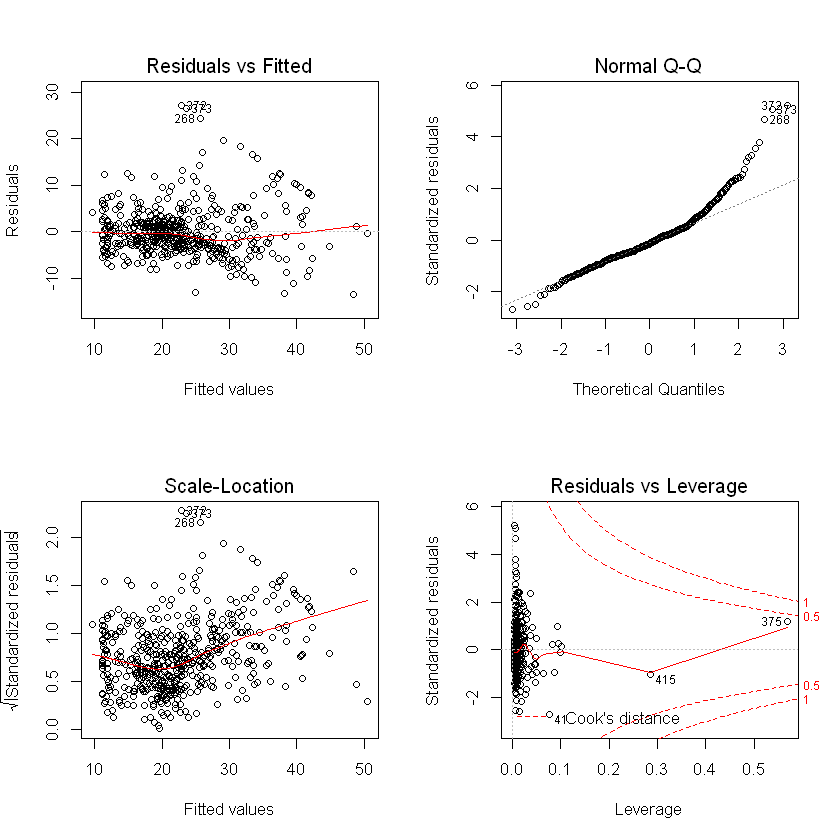

In [23]:
lm.fit5=lm(medv~poly(lstat, 5))               # Fits medv to a degree 5 polynomial
summary(lm.fit5)                              # Outputs the summary of the 5-degree fit
par(mfrow=c(2,2))                             # Create a 2x2 panel for plotting
plot(lm.fit5)                                 # Plots the degree 5 polynomial fit of medv~lstat

Instead of polynomial, sometimes we require a log transformation fit
---


Call:
lm(formula = medv ~ log(rm), data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-19.487  -2.875  -0.104   2.837  39.816 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -76.488      5.028  -15.21   <2e-16 ***
log(rm)       54.055      2.739   19.73   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.915 on 504 degrees of freedom
Multiple R-squared:  0.4358,	Adjusted R-squared:  0.4347 
F-statistic: 389.3 on 1 and 504 DF,  p-value: < 2.2e-16


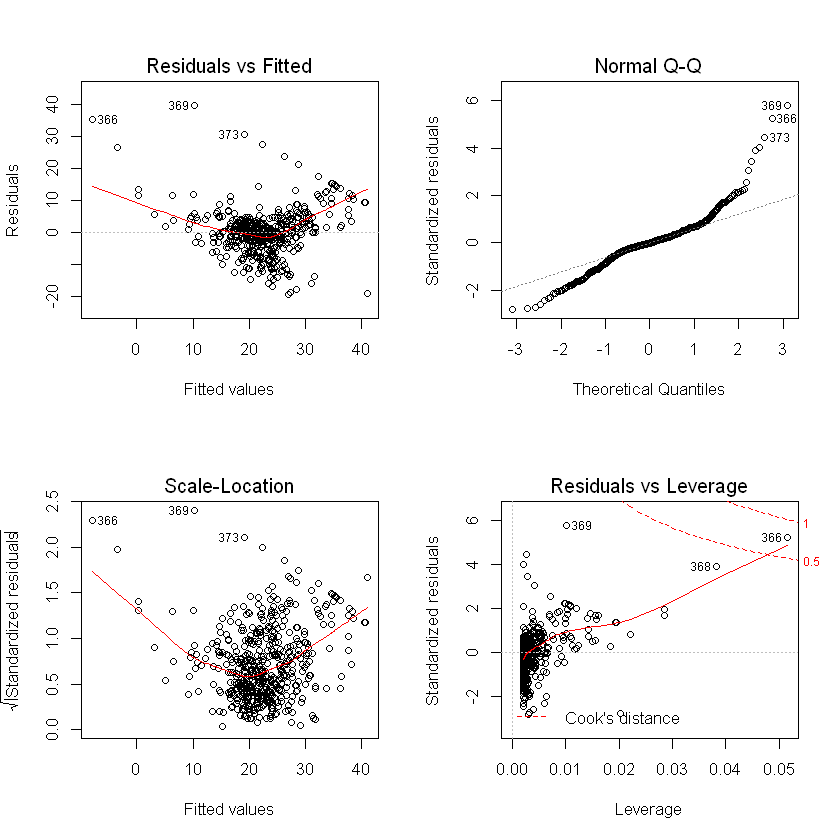

In [29]:
summary(lm(medv~log(rm), data=Boston))        # Outputs the summary of the variable medv~log(rm); a log transformation
par(mfrow=c(2,2))                             # Create a 2x2 panel for plotting
plot(lm(medv~log(rm), data=Boston))           # Plots the log transformation. P-val is approx 2.739; good fit.

5. Qualitiative Predictors
----
Before getting into this, we'll snag the dataset again.

In [30]:
# Prepare the Carseats data
fix(Carseats)
attach(Carseats)

Fit a multiple regression model with interaction terms:
---

In [31]:
lm.fit=lm(Sales~.+Income:Advertising+Price:Age, data = Carseats)
summary(lm.fit)


Call:
lm(formula = Sales ~ . + Income:Advertising + Price:Age, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9208 -0.7503  0.0177  0.6754  3.3413 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         6.5755654  1.0087470   6.519 2.22e-10 ***
CompPrice           0.0929371  0.0041183  22.567  < 2e-16 ***
Income              0.0108940  0.0026044   4.183 3.57e-05 ***
Advertising         0.0702462  0.0226091   3.107 0.002030 ** 
Population          0.0001592  0.0003679   0.433 0.665330    
Price              -0.1008064  0.0074399 -13.549  < 2e-16 ***
ShelveLocGood       4.8486762  0.1528378  31.724  < 2e-16 ***
ShelveLocMedium     1.9532620  0.1257682  15.531  < 2e-16 ***
Age                -0.0579466  0.0159506  -3.633 0.000318 ***
Education          -0.0208525  0.0196131  -1.063 0.288361    
UrbanYes            0.1401597  0.1124019   1.247 0.213171    
USYes              -0.1575571  0.1489234  -1.058 0.290729    
Inco

Accessing dummy variables
----

In [33]:
contrasts(ShelveLoc)                          # Outputs the representative dummy variables for ShelveLoc

,Good,Medium
Bad,0,0
Good,1,0
Medium,0,1
